In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def gen_random_points(n=20, xmin = 0, xmax = 10, ymin = 0, ymax = 10, seed = 42):
    pts = np.random.rand(n, 2)

    xrange = xmax - xmin
    pts[:, 0] *= xrange
    pts[:, 0] += xmin

    yrange = ymax - ymin
    pts[:, 1] *= yrange
    pts[:, 1] += ymin
    return pts

In [3]:
pts = gen_random_points()
pts

array([[7.64851575, 5.34374642],
       [4.05874872, 7.82179868],
       [1.70713847, 3.83316503],
       [8.75459361, 8.50344819],
       [3.64627815, 0.59065129],
       [4.94120135, 5.684382  ],
       [3.51948345, 7.09040809],
       [9.90561505, 3.25354845],
       [1.96742715, 1.17852709],
       [3.3044573 , 3.35477389],
       [5.96125003, 4.97821201],
       [7.18572664, 3.22855822],
       [6.44304215, 0.62131382],
       [9.07028107, 0.94975434],
       [0.79290623, 3.04031443],
       [4.89111094, 4.63016694],
       [0.45712703, 2.83780616],
       [8.17420404, 6.05204304],
       [9.61649627, 6.4556022 ],
       [2.45723036, 8.23630489]])

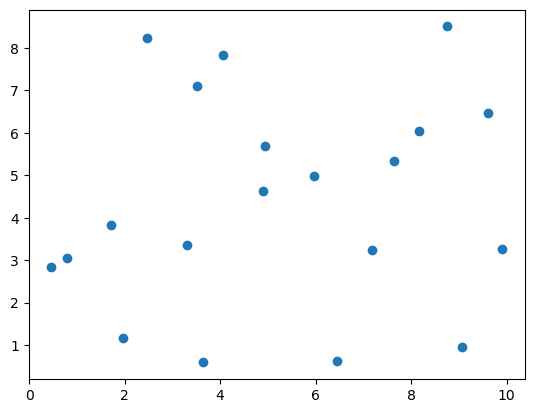

In [4]:
plt.scatter(x=pts[:, 0], y=pts[:, 1])

In [5]:
def min_dist_bf(pts):
    min_i = 0
    min_j = 0
    min_dist = float("inf")
    for i in range(len(pts)-1):
        for j in range(i+1, len(pts)):
            dist = np.sqrt(np.sum((pts[i] - pts[j]) ** 2))
            if dist < min_dist:
                min_dist = dist
                min_i = i
                min_j = j
    return min_i, min_j, min_dist

In [6]:
def min_dist_splitting(data):
    sorted_x = np.argsort(data[:, 0])
    return min_dist_recurse(data, sorted_x)

def min_dist_recurse(data, sorted_x):
    if len(sorted_x) == 3 or len(sorted_x) == 2:
        got = min_dist_bf(data[sorted_x])
        i, j, d = got
        return sorted_x[i], sorted_x[j], d

    mid = len(sorted_x) // 2
    min_i, min_j, min_d = min_dist_recurse(data, sorted_x[:mid])
    r_i, r_j, r_d = min_dist_recurse(data, sorted_x[mid:])
    if r_d < min_d:
        min_i = r_i
        min_j = r_j
        min_d = r_d

    mid_x = data[sorted_x[mid]][0]
    strip_l = mid_x - min_d
    strip_r = mid_x + min_d
    sorted_y_data = np.argsort(data[sorted_x, 1])

    for i in range(1, len(sorted_y_data)):
        real_i = sorted_x[sorted_y_data[i]]
        xi, yi = data[real_i]
        if xi < strip_l or xi > strip_r:
            continue
        for j in range(i-1, -1, -1):
            real_j = sorted_x[sorted_y_data[j]]
            xj, yj = data[real_j]
            if yi - yj > min_d:
                break
            if xj < strip_l or xj > strip_r:
                continue
            d = np.sqrt(np.sum((data[real_i] - data[real_j]) ** 2))
            if d < min_d:
                min_d = d
                min_i = real_i
                min_j = real_j
    return min_i, min_j, min_d

In [7]:
big_pts = gen_random_points(n=1000)

In [8]:
min_dist_bf(big_pts)

(245, 378, 0.009773464324546927)

In [9]:
min_dist_splitting(big_pts)

(378, 245, 0.009773464324546927)

In [10]:
%%timeit
min_dist_bf(big_pts)

1.02 s ± 3.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
min_dist_splitting(big_pts)

9.59 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
